In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


import seaborn as sns
%matplotlib inline

df_lst_seattle = pd.read_csv('D:/D/OneDrive - Infosys Limited/Data/Codes/Udacity/Datascience blog/seattle/listings.csv')
df_lst_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [57]:
df_lst_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Q1: Which factors impact the price point the most and how? 

In this question we will create a linear regression model to identify factors which impact the pricing the model

The variables that can effect the pricing are 

1) neighbourhood_cleansed
2) accommodates
3) property_type
4) room_type
5) bedrooms
...

We will need to clean the data first, then impute it

In [38]:
df_lst_seattle['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [39]:
df_lst_seattle['price'].replace('[\$,]', '', regex=True, inplace=True)
df_lst_seattle['price'] = df_lst_seattle['price'].astype(float)

def preclean(df):
    '''
    INPUT:
    df - the dataframe 
    
    OUTPUT:
    X - cleaned dataframe that containes all variables which may affect target variable
    y - cleaned dataframe of target variable('price')
    
    Split the original dataframe to target variable and others. Clean the data by
    1) Drop the row with NaN target variable
    2) Imputing NaN values for numerical variables
    3) Create dummies for categorical values
    
    For all variables which may affect target variable, we focus on columns of 'neighbourhood_cleansed', 
    'property_type', 'room_type', 'accommodates' and 'bedrooms'.
    '''
    
    df['price'].replace('[\$,]', '', regex=True, inplace=True)
    df['price'] = df['price'].astype(float)
    
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    
    X = df[['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bedrooms']]
    
    num_vars = X.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
    
    cat_vars = X.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        X = pd.concat([X.drop([var], axis=1), pd.get_dummies(X[var], drop_first=True)], axis=1)
    
    return X, y

In [40]:
X_sea, y_sea = preclean(df_lst_seattle)
X_sea.head()

C:\Users\tohan_shrivastava01\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,accommodates,bedrooms,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,...,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Private room,Shared room
0,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:

#Split into train and test
X_sea_train, X_sea_test, y_sea_train, y_sea_test = train_test_split(X_sea, y_sea, test_size = .30, random_state=42) 

lm_model_sea = LinearRegression(normalize=True) # Instantiate
lm_model_sea.fit(X_sea_train, y_sea_train) #Fit
        
#Predict and score the model
y_sea_test_preds = lm_model_sea.predict(X_sea_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_sea_test, y_sea_test_preds), len(y_sea_test))

'The r-squared score for your model was 0.5751219375445931 on 1146 values.'

In [42]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_sea_df = coef_weights(lm_model_sea.coef_, X_sea_train)

#A quick look at the top results
coef_sea_df.head(30)

,est_int,coefs,abs_coefs
89,Boat,167.048944,167.048944
95,Dorm,-137.715151,137.715151
62,Portage Bay,87.738386,87.738386
74,Southeast Magnolia,85.343317,85.343317
61,Pioneer Square,85.106157,85.106157
59,Pike-Market,83.409198,83.409198
33,Industrial District,78.724175,78.724175
84,Westlake,68.613684,68.613684
104,Shared room,-66.006801,66.006801
82,West Queen Anne,63.599529,63.599529


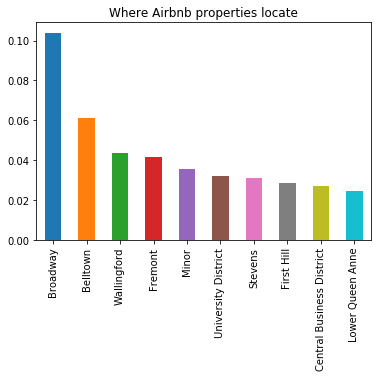

In [59]:
loc_vals = df_lst_seattle['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/df_lst_seattle.shape[0]).plot(kind="bar");
plt.title("Where Airbnb properties locate");

Conclusions

1. Property plays and important role in the prcing 

In [46]:
    
df_lst_boston = pd.read_csv('D:/D/OneDrive - Infosys Limited/Data/Codes/Udacity/Datascience blog/boston-airbnb-open-data/listings.csv')
df_lst_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [47]:
df_lst_boston['price'].replace('[\$,]', '', regex=True, inplace=True)
df_lst_boston['price'] = df_lst_boston['price'].astype(float)

price_boston = df_lst_boston['price'].mean()
price_seattle = df_lst_seattle['price'].mean()

"The average price of Airbnb is ${:.2f} in Boston, and ${:.2f} in Seattle, which is ${:.2f} {} than Boston".format(price_boston, price_seattle, abs(price_seattle-price_boston), 'higher' if price_seattle>price_boston else 'lower')

'The average price of Airbnb is $173.93 in Boston, and $127.98 in Seattle, which is $45.95 lower than Boston'

In [48]:
review_boston = df_lst_boston['review_scores_rating'].mean()
review_seattle = df_lst_seattle['review_scores_rating'].mean()   

"The average review rating of Airbnb is {:.2f} in Boston, and {:.2f} in Seattle.".format(review_boston, review_seattle)

'The average review rating of Airbnb is 91.92 in Boston, and 94.54 in Seattle.'

In [49]:
X_bos, y_bos = preclean(df_lst_boston)

#Split into train and test
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size = .30, random_state=42) 

lm_model_bos = LinearRegression(normalize=True) # Instantiate
lm_model_bos.fit(X_bos_train, y_bos_train) #Fit
        
#Predict and score the model
y_bos_test_preds = lm_model_bos.predict(X_bos_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_bos_test, y_bos_test_preds), len(y_bos_test))

C:\Users\tohan_shrivastava01\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


'The r-squared score for your model was 0.27556336739960574 on 1076 values.'

In [50]:

#Use the function
coef_bos_df = coef_weights(lm_model_bos.coef_, X_bos_train)

#A quick look at the top results
coef_bos_df.head(30)

,est_int,coefs,abs_coefs
22,South Boston Waterfront,152.336313,152.336313
28,Camper/RV,-149.265628,149.265628
14,Leather District,115.508247,115.508247
2,Back Bay,109.783901,109.783901
3,Bay Village,103.930813,103.930813
4,Beacon Hill,102.918218,102.918218
9,Downtown,92.902789,92.902789
11,Fenway,86.349016,86.349016
23,South End,73.188530,73.188530
39,Shared room,-72.663745,72.663745


In [51]:
df_lst_boston['property_type'].value_counts()


Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

##Question 3: Which aspects are valued most in terms of customer experience?

In [52]:
df_lst_seattle[['review_scores_rating', 'review_scores_accuracy']].head()


,review_scores_rating,review_scores_accuracy
0,95.0,10.0
1,96.0,10.0
2,97.0,10.0
3,NaN,NaN
4,92.0,9.0


In [53]:

def preclean_review(df):
    '''
    INPUT:
    df - the dataframe 
    
    OUTPUT:
    X - cleaned dataframe that containes all variables which may affect target variable
    y - cleaned dataframe of target variable('review_scores_rating')
    
    Split the original dataframe to target variable and others. Clean the data by
    1) Drop the row with NaN target variable
    2) Imputing NaN values for numerical variables
    3) Create dummies for categorical values(actually not necessary here)
    
    For all variables which may affect target variable, we focus on columns of 'review_scores_value', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication' and 'review_scores_location'.
    '''    
    df = df.dropna(subset=['review_scores_rating'], axis=0)
    y = df['review_scores_rating'].astype(float)
    
    X = df[['review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].astype(float)
    
    num_vars = X.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
    
    cat_vars = X.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        X = pd.concat([X.drop([var], axis=1), pd.get_dummies(X[var], drop_first=True)], axis=1)
    
    return X, y

In [54]:
X_rev, y_rev = preclean_review(df_lst_seattle)

#Split into train and test
X_rev_train, X_rev_test, y_rev_train, y_rev_test = train_test_split(X_rev, y_rev, test_size = .30, random_state=42) 

lm_model_rev = LinearRegression(normalize=True) # Instantiate
lm_model_rev.fit(X_rev_train, y_rev_train) #Fit
        
#Predict and score the model
y_rev_test_preds = lm_model_rev.predict(X_rev_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_rev_test, y_rev_test_preds), len(y_rev_test))

'The r-squared score for your model was 0.6485531047095809 on 952 values.'

In [55]:
#Use the function
coef_df_rev = coef_weights(lm_model_rev.coef_, X_rev_train)

#A quick look at the top results
coef_df_rev.head(30)

,est_int,coefs,abs_coefs
0,review_scores_value,3.058346,3.058346
2,review_scores_cleanliness,2.352576,2.352576
1,review_scores_accuracy,1.526999,1.526999
3,review_scores_checkin,1.294785,1.294785
4,review_scores_communication,1.267077,1.267077
5,review_scores_location,0.533938,0.533938


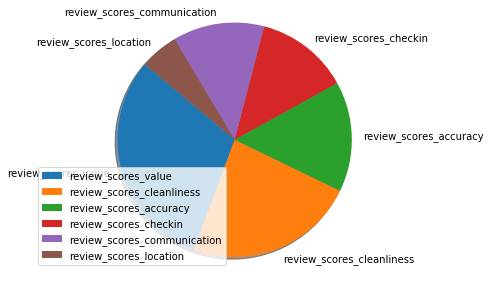

In [56]:
patches, texts = plt.pie(coef_df_rev['abs_coefs'], labels=coef_df_rev['est_int'], shadow=True, startangle=140)

plt.legend(patches, coef_df_rev['est_int'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()